[*********************100%***********************]  1 of 1 completed
C:\Users\m.sharafi\AppData\Local\Temp\ipykernel_11296\3871450203.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  final_capital = float(capital_history[-1])


Final Capital at the end of 2024: $4535.12


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
C:\Users\m.sharafi\AppData\Local\Temp\ipykernel_11296\3871450203.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  year_capital = float(capital_series.loc[closest_date])


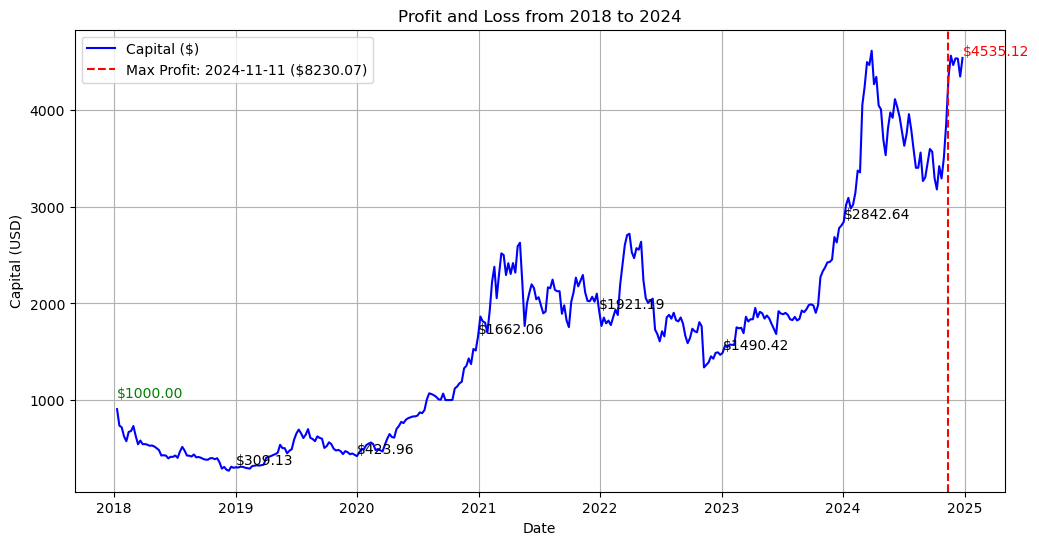

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import timedelta

# Download Bitcoin price data
btc = yf.download(tickers="BTC-USD", start="2018-01-01", end="2024-12-31", auto_adjust=False)

# Convert index to date-only format
btc.index = pd.to_datetime(btc.index).date  

# Compute daily profit
btc["Daily Profit"] = btc["Close"] - btc["Open"]

# Find the day with the highest profit
max_profit_day = btc["Daily Profit"].idxmax()
max_profit_value = btc.loc[max_profit_day, "Daily Profit"]

# Initial investment
initial_capital = 1000
capital = initial_capital
bitcoin_amount = 0

# Lists to store results
capital_history = []
dates = []

# Simulate trading
for week_start in pd.date_range(start="2018-01-01", end="2024-12-31", freq="W-SUN"):
    week_end = week_start + timedelta(days=3)  # Wednesday
    
    week_start = week_start.date()
    week_end = week_end.date()
    
    monday_start = week_start + timedelta(days=1)  # Monday
    if monday_start in btc.index and week_end in btc.index:
        open_price = btc.loc[monday_start, "Open"]  # Buy on Monday
        close_price = btc.loc[week_end, "Close"]  # Sell on Wednesday

        bitcoin_amount = capital / open_price
        capital = bitcoin_amount * close_price

        capital_history.append(capital)
        dates.append(week_end)
    
# Handling empty `capital_history`
if capital_history:
    final_capital = float(capital_history[-1])
    print(f"Final Capital at the end of 2024: ${final_capital:.2f}")
else:
    print("Error: No trades executed. Check data availability.")
    exit()

# Convert lists to pandas Series
capital_series = pd.Series(capital_history, index=dates)

# Plot profit and loss chart
plt.figure(figsize=(12, 6))
plt.plot(capital_series, label="Capital ($)", color="blue")

# Mark the day with the highest profit
plt.axvline(max_profit_day, color='red', linestyle='--', label=f"Max Profit: {max_profit_day} (${max_profit_value.item():.2f})")


# Display initial capital
plt.text(dates[0], initial_capital, f"${initial_capital:.2f}", fontsize=10, verticalalignment='bottom', color="green")

# Display final capital
plt.text(dates[-1], final_capital, f"${final_capital:.2f}", fontsize=10, verticalalignment='bottom', color="red")

# Display capital at the start of each year
for year in range(2019, 2025):
    year_date = pd.Timestamp(f"{year}-01-01").date()
    closest_date = min(dates, key=lambda d: abs(d - year_date))
    
    year_capital = float(capital_series.loc[closest_date])
    plt.text(closest_date, year_capital, f"${year_capital:.2f}", fontsize=10, verticalalignment='bottom', color="black")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Capital (USD)")
plt.title("Profit and Loss from 2018 to 2024")
plt.legend()
plt.grid(True)


In [4]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
